# Análise e processamento dos dados
- Processar dados nulos
- Modificar os tipos
- Analisar/Adicionar novas colunas

In [1]:
import pandas as pd
import numpy as np
from utils import *


## 1. Carregamento do dataset 

In [2]:

path = 'dataset/raw/datasets_2005_2023.csv'
# Carrega o dataset e Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(path, skiprows=0, delimiter=';')


c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Mostra as primeiras n linhas do Dataframe
dataset.head(n= 4)


,Unnamed: 0,Estado,Bacia,Nome Poço,Operador,Campo,Operador_empresa,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),Gás Natural_associado (Mm³/dia),Gás Natural_no_associado (Mm³/dia),Gás Natural_total (Mm³/dia),Volume Gás Royalties (Mm³/dia),Água (bbl/dia),Instalação Destino,Tipo Instalação,Tempo de Produção (hs por mês)
0,6,Bahia,Recôncavo,7-C-10-BA,7C 0010 BA,CANDEIAS,Petrobras,480000036389734,2005/01,"9,4367","0,0000","9,4367","0,0000","0,0000","0,0000","0,00000","0,0000",NaN,NaN,31.0
1,7,Bahia,Recôncavo,7-C-13-BA,7C 0013 BA,CANDEIAS,Petrobras,480000036389734,2005/01,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,00000","0,0000",NaN,NaN,31.0
2,8,Bahia,Recôncavo,7-A-6-BA,7A 0006 BA,ARATU,Petrobras,480000036329758,2005/01,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,00000","0,0000",NaN,NaN,31.0
3,9,Bahia,Recôncavo,3-A-9-BA,3A 0009 BA,ARATU,Petrobras,480000036329758,2005/01,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,00000","0,0000",NaN,NaN,31.0


In [4]:
dataset['Estado'].unique()

array(['Bahia', 'Alagoas', 'Sergipe', 'Espírito Santo', 'Ceará',
       'Rio Grande do Norte', 'Amazonas', 'Maranhão', nan, 'Paraná'],
      dtype=object)

## 2. Pré-processamento do dataset
- Excluir colunas desnecessárias
- Tratar dados nulos
- Adicionar novas colunas

### 2.1 Excluir colunas desnecesárias 

In [5]:
# Remove colunas desnecessarias
drop_atributos = ['Unnamed: 0', 'Operador', 'Número do Contrato', 'Água (bbl/dia)', 'Gás Natural_associado (Mm³/dia)', 
                  'Gás Natural_no_associado (Mm³/dia)', 'Volume Gás Royalties (Mm³/dia)', 
                  'Óleo (bbl/dia)', 'Condensado (bbl/dia)', 'Instalação Destino', 'Tipo Instalação']
dataset = dataset.drop(columns=drop_atributos)


In [6]:
# Mostra as primeiras n linhas do Dataframe
dataset.head(n= 4)

,Estado,Bacia,Nome Poço,Campo,Operador_empresa,Período,Petróleo (bbl/dia),Gás Natural_total (Mm³/dia),Tempo de Produção (hs por mês)
0,Bahia,Recôncavo,7-C-10-BA,CANDEIAS,Petrobras,2005/01,"9,4367","0,0000",31.0
1,Bahia,Recôncavo,7-C-13-BA,CANDEIAS,Petrobras,2005/01,"0,0000","0,0000",31.0
2,Bahia,Recôncavo,7-A-6-BA,ARATU,Petrobras,2005/01,"0,0000","0,0000",31.0
3,Bahia,Recôncavo,3-A-9-BA,ARATU,Petrobras,2005/01,"0,0000","0,0000",31.0


### 2.2 Tratar dados nulos

In [7]:
# verificando nulls no dataset
dataset.isnull().sum()

Estado                            3063
Bacia                             3063
Nome Poço                         3063
Campo                             3063
Operador_empresa                  3063
Período                           3063
Petróleo (bbl/dia)                3063
Gás Natural_total (Mm³/dia)       3063
Tempo de Produção (hs por mês)    3063
dtype: int64

In [8]:
dataset_no_null = dataset.dropna()

In [9]:
dataset_no_null.isnull().sum()

Estado                            0
Bacia                             0
Nome Poço                         0
Campo                             0
Operador_empresa                  0
Período                           0
Petróleo (bbl/dia)                0
Gás Natural_total (Mm³/dia)       0
Tempo de Produção (hs por mês)    0
dtype: int64

In [10]:
# Mostra as primeiras n linhas do Dataframe
dataset.head(n= 4)

,Estado,Bacia,Nome Poço,Campo,Operador_empresa,Período,Petróleo (bbl/dia),Gás Natural_total (Mm³/dia),Tempo de Produção (hs por mês)
0,Bahia,Recôncavo,7-C-10-BA,CANDEIAS,Petrobras,2005/01,"9,4367","0,0000",31.0
1,Bahia,Recôncavo,7-C-13-BA,CANDEIAS,Petrobras,2005/01,"0,0000","0,0000",31.0
2,Bahia,Recôncavo,7-A-6-BA,ARATU,Petrobras,2005/01,"0,0000","0,0000",31.0
3,Bahia,Recôncavo,3-A-9-BA,ARATU,Petrobras,2005/01,"0,0000","0,0000",31.0


### 2.3 Modificar os tipos
Alguns atributos estão no formato de **string**, é necessário substituir a ',' pelo '.'.

In [11]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Estado                             object
Bacia                              object
Nome Poço                          object
Campo                              object
Operador_empresa                   object
Período                            object
Petróleo (bbl/dia)                 object
Gás Natural_total (Mm³/dia)        object
Tempo de Produção (hs por mês)    float64
dtype: object

In [12]:
#Substituição da '.' pelo ' '
dataset_no_null['Petróleo (bbl/dia)'] = dataset_no_null['Petróleo (bbl/dia)'].str.replace('.', '')
dataset_no_null['Gás Natural_total (Mm³/dia)'] = dataset_no_null['Gás Natural_total (Mm³/dia)'].str.replace('.', '')


c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Substituição da ',' pelo '.'
dataset_no_null['Petróleo (bbl/dia)'] = dataset_no_null['Petróleo (bbl/dia)'].str.replace(',', '.')
dataset_no_null['Gás Natural_total (Mm³/dia)'] = dataset_no_null['Gás Natural_total (Mm³/dia)'].str.replace(',', '.')


c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Mostra as primeiras n linhas do Dataframe
dataset_no_null.head(n= 6)

,Estado,Bacia,Nome Poço,Campo,Operador_empresa,Período,Petróleo (bbl/dia),Gás Natural_total (Mm³/dia),Tempo de Produção (hs por mês)
0,Bahia,Recôncavo,7-C-10-BA,CANDEIAS,Petrobras,2005/01,9.4367,0.0000,31.0
1,Bahia,Recôncavo,7-C-13-BA,CANDEIAS,Petrobras,2005/01,0.0000,0.0000,31.0
2,Bahia,Recôncavo,7-A-6-BA,ARATU,Petrobras,2005/01,0.0000,0.0000,31.0
3,Bahia,Recôncavo,3-A-9-BA,ARATU,Petrobras,2005/01,0.0000,0.0000,31.0
4,Bahia,Recôncavo,7-C-25-BA,CANDEIAS,Petrobras,2005/01,3.7779,0.0000,31.0
5,Bahia,Recôncavo,7-C-39-BA,CANDEIAS,Petrobras,2005/01,1.1342,0.0000,31.0


In [15]:
# Mudança do tipo
atributos_int = ['Petróleo (bbl/dia)', 'Gás Natural_total (Mm³/dia)']
dataset_no_null[atributos_int] = dataset_no_null[atributos_int].astype(np.float32)


c:\Users\mayar\miniconda3\envs\dados\lib\site-packages\pandas\core\frame.py:2960: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
# Verifica o tipo de dataset de cada atributo
dataset_no_null.dtypes

Estado                             object
Bacia                              object
Nome Poço                          object
Campo                              object
Operador_empresa                   object
Período                            object
Petróleo (bbl/dia)                float32
Gás Natural_total (Mm³/dia)       float32
Tempo de Produção (hs por mês)    float64
dtype: object

### 2.4 Adicionar novas colunas
Separar colunas de mês/ano

In [17]:
# splitting is done on the basis of underscore.
dataset_no_null[['Ano','Mes']] = dataset_no_null.Período.str.split("/",expand=True)


In [18]:
# Mostra as primeiras n linhas do Dataframe
dataset_no_null.head(n= 4)

,Estado,Bacia,Nome Poço,Campo,Operador_empresa,Período,Petróleo (bbl/dia),Gás Natural_total (Mm³/dia),Tempo de Produção (hs por mês),Ano,Mes
0,Bahia,Recôncavo,7-C-10-BA,CANDEIAS,Petrobras,2005/01,9.4367,0.0,31.0,2005,01
1,Bahia,Recôncavo,7-C-13-BA,CANDEIAS,Petrobras,2005/01,0.0000,0.0,31.0,2005,01
2,Bahia,Recôncavo,7-A-6-BA,ARATU,Petrobras,2005/01,0.0000,0.0,31.0,2005,01
3,Bahia,Recôncavo,3-A-9-BA,ARATU,Petrobras,2005/01,0.0000,0.0,31.0,2005,01


In [19]:
dataset_no_null.dtypes

Estado                             object
Bacia                              object
Nome Poço                          object
Campo                              object
Operador_empresa                   object
Período                            object
Petróleo (bbl/dia)                float32
Gás Natural_total (Mm³/dia)       float32
Tempo de Produção (hs por mês)    float64
Ano                                object
Mes                                object
dtype: object

In [20]:
# Mudança do tipo
atributos_int = ['Ano', 'Mes']
dataset_no_null[atributos_int] = dataset_no_null[atributos_int].astype(np.int32)
# Filtar até o ano de 2022
dataset_no_null = dataset_no_null[dataset_no_null['Ano'] < 2023]
# Mostra as dimensões do dataset
print(dataset_no_null.shape)

(1960723, 11)


In [21]:
# Salva o dataset datasets_2021_2023
create_folder('dataset/preprocess')
dataset_no_null.to_csv('dataset/preprocess/dataset_preprocess.xls', sep=';')

A pasta já existe!


### 3. Correlação entre os atributos

In [22]:
dataset_numeric = dataset_no_null.copy()
# Adiciona IDs para o atributo UNIDADE DA FEDERAÇÃO
set_ids(dataset_numeric, "Estado")
# Adiciona IDs para o atributo PRODUTO
set_ids(dataset_numeric, "Bacia")
# Adiciona IDs para o atributo LOCALIZAÇÃO
set_ids(dataset_numeric, "Campo")
# Adiciona IDs para o atributo LOCALIZAÇÃO
set_ids(dataset_numeric, "Operador_empresa")


In [23]:
dataset_numeric = dataset_numeric[['ID_Estado', 'ID_Bacia', 'ID_Operador_empresa', 'Ano', 'Mes', 'Tempo de Produção (hs por mês)', 'Petróleo (bbl/dia)', 'Gás Natural_total (Mm³/dia)']]


<AxesSubplot:>

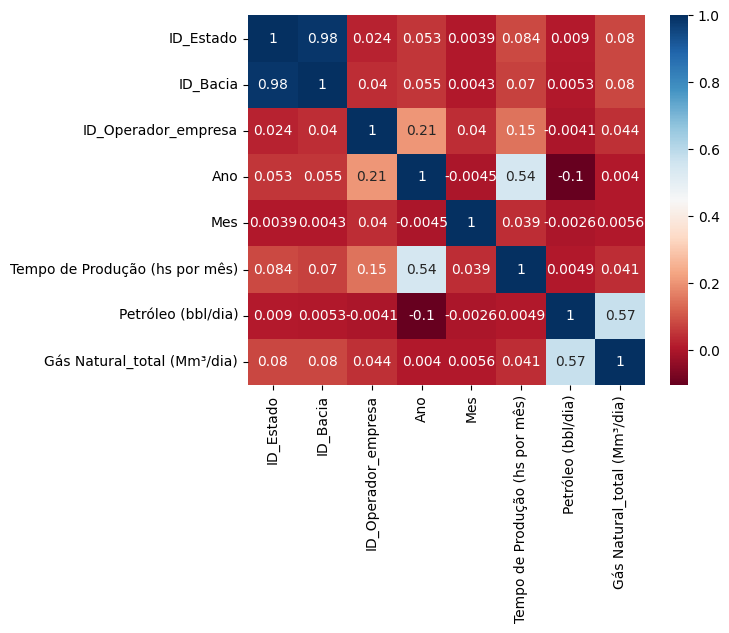

In [24]:
import seaborn as sns

# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset_numeric.corr(), annot=True, cmap='RdBu')
